In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BinaryClassification.csv')

df.head()

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df.shape

(150, 5)

In [47]:
df.describe()

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_length_in_cm  150 non-null    float64
 1   Sepal_width_in_cm   150 non-null    float64
 2   Petal_length_in_cm  150 non-null    float64
 3   Petal_width_in_cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.duplicated().sum()

np.int64(3)

In [50]:
df[df.duplicated()]

,Sepal_length_in_cm,Sepal_width_in_cm,Petal_length_in_cm,Petal_width_in_cm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(147, 5)

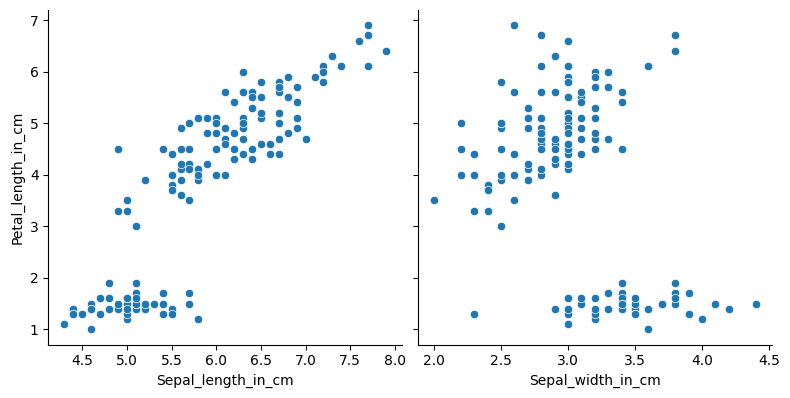

In [53]:
sns.pairplot(df, x_vars=['Sepal_length_in_cm', 'Sepal_width_in_cm'], y_vars='Petal_length_in_cm', height=4, aspect=1, kind='scatter')
plt.show()

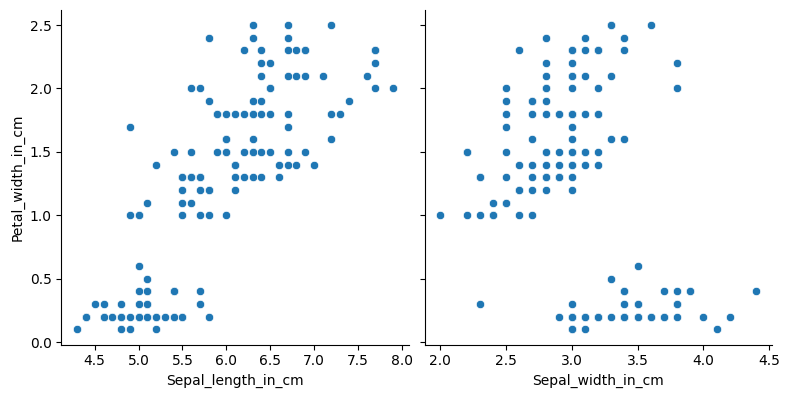

In [54]:
sns.pairplot(df, x_vars=['Sepal_length_in_cm', 'Sepal_width_in_cm'], y_vars='Petal_width_in_cm', height=4, aspect=1, kind='scatter')
plt.show()

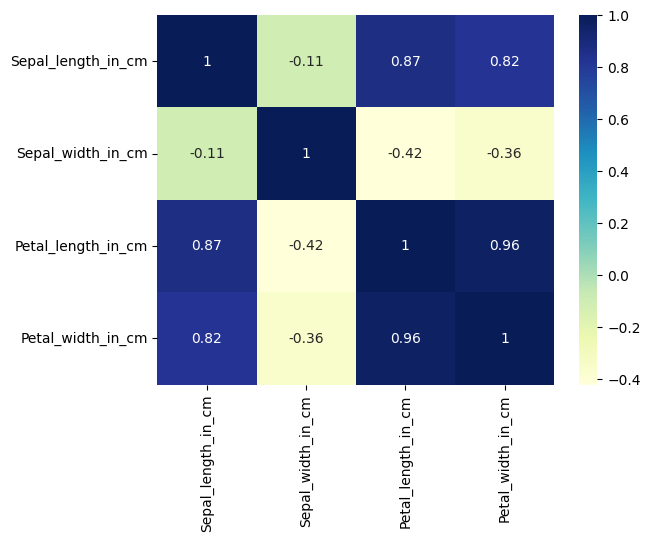

In [55]:
df_corr = df.drop("Species",axis=1)
sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X = df.drop("Species",axis=1).values
y = df["Species"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [57]:
model.fit(X_train,y_train)

LogisticRegression()

# ROC

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

y_pred_probs = model.predict_proba(X_test)[:,1]


roc_score = roc_auc_score(y_test, y_pred_probs)
print(roc_score)

0.9411764705882353


# GridsearcshCV

In [59]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
                           


grid_search.fit(X_train, y_train)   

/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 119

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [60]:
print("score: {}".format(grid_search.best_score_))

score: 0.7960144927536231
